In [1]:
import numpy as np 
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/private-preliminary-data-intelligo/sample_submission.csv
/kaggle/input/private-preliminary-data-intelligo/test_order_id.csv
/kaggle/input/private-preliminary-data-intelligo/test/df_Orders.csv
/kaggle/input/private-preliminary-data-intelligo/test/df_Customers.csv
/kaggle/input/private-preliminary-data-intelligo/test/df_Products.csv
/kaggle/input/private-preliminary-data-intelligo/test/df_Payments.csv
/kaggle/input/private-preliminary-data-intelligo/test/df_OrderItems.csv
/kaggle/input/private-preliminary-data-intelligo/train/df_Orders.csv
/kaggle/input/private-preliminary-data-intelligo/train/df_Customers.csv
/kaggle/input/private-preliminary-data-intelligo/train/df_Products.csv
/kaggle/input/private-preliminary-data-intelligo/train/df_Payments.csv
/kaggle/input/private-preliminary-data-intelligo/train/df_OrderItems.csv


In [2]:
# read multiple csv files
orders_train = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/train/df_Orders.csv')
customers_train = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/train/df_Customers.csv')
products_train = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/train/df_Products.csv')
payments_train = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/train/df_Payments.csv')
orderitems_train = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/train/df_OrderItems.csv')

orders_test = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/test/df_Orders.csv')
customers_test = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/test/df_Customers.csv')
products_test = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/test/df_Products.csv')
payments_test = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/test/df_Payments.csv')
orderitems_test = pd.read_csv('/kaggle/input/private-preliminary-data-intelligo/test/df_OrderItems.csv')

# Data Exploration

### Orders

In [3]:
orders_train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [4]:
orders_test.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30


In [3]:
print(orders_train.shape, orders_test.shape)

(89316, 7) (38279, 4)


### Customers

In [5]:
customers_train.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [6]:
customers_test.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,I74lXDOfoqsp,6020,goiania,GO
1,47TuLHF2s7X5,23020,viamao,RS
2,dQ0dqI8Qwlj8,75094,campinas,SP
3,iQCmWhNkIczb,89284,santana de parnaiba,SP
4,Dp2g6JH8tO5Z,39810,aripuana,MT


In [20]:
print(customers_train.shape, customers_test.shape)

(89316, 4) (38279, 4)


### Products

In [7]:
products_train.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


In [8]:
products_test.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0
1,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0
2,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0
3,yWlFGkKYfrpa,toys,8950.0,40.0,30.0,40.0
4,h6MCbrwh5kiC,toys,2301.0,32.0,35.0,34.0


In [21]:
print(products_train.shape, products_test.shape)

(89316, 6) (38279, 6)


### Payments 

In [9]:
payments_train.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


In [10]:
payments_test.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,u6rPMRAYIGig,1,credit_card,2,155.77
1,ohY8f4FEbX19,1,credit_card,1,4.07
2,I28liQek73i2,1,wallet,1,381.59
3,bBG1T89mlY8W,1,credit_card,3,14.76
4,CYxJJSQS8Lbo,1,wallet,1,284.09


In [22]:
print(payments_train.shape, payments_test.shape)

(89316, 5) (38279, 5)


### Order items

In [11]:
orderitems_train.head()

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [12]:
orderitems_test.head()

,order_id,product_id,seller_id,price,shipping_charges
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90
1,ohY8f4FEbX19,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28
2,I28liQek73i2,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11
3,bBG1T89mlY8W,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05
4,CYxJJSQS8Lbo,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41


In [23]:
print(orderitems_train.shape, orderitems_test.shape)

(89316, 5) (38279, 5)


### Concat all df in train folder

In [3]:
combined = pd.concat([orders_train, customers_train, payments_train,
                     orderitems_train, products_train],
                     axis=1, join="inner")
combined.shape

(89316, 27)

In [4]:
combined.columns.duplicated()

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False])

In [5]:
# drop duplicate columns in combined
combined = combined.loc[:,~combined.columns.duplicated(keep='last')]

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   89316 non-null  object 
 1   order_purchase_timestamp       89316 non-null  object 
 2   order_approved_at              89307 non-null  object 
 3   order_delivered_timestamp      87427 non-null  object 
 4   order_estimated_delivery_date  89316 non-null  object 
 5   customer_id                    89316 non-null  object 
 6   customer_zip_code_prefix       89316 non-null  int64  
 7   customer_city                  89316 non-null  object 
 8   customer_state                 89316 non-null  object 
 9   payment_sequential             89316 non-null  int64  
 10  payment_type                   89316 non-null  object 
 11  payment_installments           89316 non-null  int64  
 12  payment_value                  89316 non-null 

### Concat all df in test folder

In [6]:
df_test = pd.concat([orders_test, customers_test, payments_test,
                     orderitems_test, products_test],
                     axis=1, join="inner")
df_test.shape

(38279, 24)

In [7]:
df_test.columns.duplicated()

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False])

In [8]:
# drop duplicate columns in df_test
df_test = df_test.loc[:,~df_test.columns.duplicated(keep='last')]

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  38279 non-null  object 
 1   order_approved_at         38272 non-null  object 
 2   customer_id               38279 non-null  object 
 3   customer_zip_code_prefix  38279 non-null  int64  
 4   customer_city             38279 non-null  object 
 5   customer_state            38279 non-null  object 
 6   payment_sequential        38279 non-null  int64  
 7   payment_type              38279 non-null  object 
 8   payment_installments      38279 non-null  int64  
 9   payment_value             38279 non-null  float64
 10  order_id                  38279 non-null  object 
 11  seller_id                 38279 non-null  object 
 12  price                     38279 non-null  float64
 13  shipping_charges          38279 non-null  float64
 14  produc

# Data Train Cleaning

In [9]:
total_missing = combined.isnull().sum().sort_values(ascending=False)
percentage = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percentage], axis=1, keys=['Total', 'Percent', 'dtypes'])
missing_data

,Total,Percent
order_delivered_timestamp,1889,0.021150
product_category_name,308,0.003448
product_width_cm,15,0.000168
product_height_cm,15,0.000168
product_length_cm,15,0.000168
product_weight_g,15,0.000168
order_approved_at,9,0.000101
order_id,0,0.000000
product_id,0,0.000000
shipping_charges,0,0.000000


In [10]:
# handling missing values

# we have 1889 missing value in order_delivered_timestamp and 9 missing value in order_approved_at
# let's conduct interpolation
combined['order_delivered_timestamp'] = combined['order_delivered_timestamp'].interpolate(method='pad')
combined['order_approved_at'] = combined['order_approved_at'].interpolate(method='pad')

# what about the 'product_category_name'? let's perform mode imputation
combined['product_category_name'] = combined['product_category_name'].fillna(combined['product_category_name'].mode()[0])

# median imputation for: 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
# List of numerical columns with missing value
missval_num = combined[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
# Fill missing values with median for each numerical column
for col in missval_num:
    median_value = combined[col].median()  # Calculate the median
    combined[col].fillna(median_value, inplace=True)

combined.shape

(89316, 23)

In [11]:
combined.isnull().sum()

order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_id                         0
seller_id                        0
price                            0
shipping_charges                 0
product_id                       0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

# Create Label: is_late

In [12]:
combined.order_status.value_counts()

order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64

In [13]:
# filter rows with order_status = delivered
combined = combined[combined.order_status == 'delivered']

In [13]:
combined.shape

(87428, 23)

In [14]:
combined['order_estimated_delivery_date'] = pd.to_datetime(combined['order_estimated_delivery_date'], format='%Y-%m-%d')

# only take date from order_delivered_timestamp
combined['order_delivered_date'] = pd.to_datetime(combined['order_delivered_timestamp']).dt.date
combined['order_delivered_date'] = pd.to_datetime(combined['order_delivered_date'], format='%Y-%m-%d')

In [ ]:
# the days when customers are waiting their order to be approved by sellers
#combined['waiting_seller_to_approve'] = (combined['order_approved_at'].dt.date - combined['order_purchase_timestamp'].dt.date).dt.days

# !total days spent from placing order until it delivered to customer location
#combined['purchase_to_arrived_actual'] = (combined['order_delivered_timestamp'].dt.date - combined['order_purchase_timestamp'].dt.date).dt.days

# total days spent from seller process the order, send the package to courier, package on the way, until it arrives at customer location
#combined['package_otw'] = (combined['order_delivered_timestamp'].dt.date - combined['order_approved_at'].dt.date).dt.days

# !duration of estimated shipping from purchasing date until estimated delivery date
#combined['purchase_to_arrived_estimation'] = (combined['order_estimated_delivery_date'].dt.date - combined['order_purchase_timestamp'].dt.date).dt.days

In [15]:
# calculate days spend between 2 given date

def numOfDays(date1, date2):
    return reduce(lambda x, y: (y-x).dt.days, [date1, date2])

In [16]:
combined['arrived_days'] = numOfDays(combined['order_delivered_date'], combined['order_estimated_delivery_date'])

In [17]:
# create new label
# combined['is_late_string'] = combined['arrived_days'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')
combined['is_late'] = combined['arrived_days'].apply(lambda x : 0 if x >=0 else 1)

In [18]:
combined['is_late'].value_counts()

is_late
0    81822
1     5606
Name: count, dtype: int64

In [19]:
# drop unused columns
combined = combined.drop(columns=['order_delivered_timestamp',
       'order_estimated_delivery_date', 'arrived_days',
    'order_status', 'order_delivered_date'], axis=1)

### Concat combined and df_test

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87428 entries, 0 to 89315
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  87428 non-null  object 
 1   order_approved_at         87428 non-null  object 
 2   customer_id               87428 non-null  object 
 3   customer_zip_code_prefix  87428 non-null  int64  
 4   customer_city             87428 non-null  object 
 5   customer_state            87428 non-null  object 
 6   payment_sequential        87428 non-null  int64  
 7   payment_type              87428 non-null  object 
 8   payment_installments      87428 non-null  int64  
 9   payment_value             87428 non-null  float64
 10  order_id                  87428 non-null  object 
 11  seller_id                 87428 non-null  object 
 12  price                     87428 non-null  float64
 13  shipping_charges          87428 non-null  float64
 14  product_id 

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_purchase_timestamp  38279 non-null  object 
 1   order_approved_at         38272 non-null  object 
 2   customer_id               38279 non-null  object 
 3   customer_zip_code_prefix  38279 non-null  int64  
 4   customer_city             38279 non-null  object 
 5   customer_state            38279 non-null  object 
 6   payment_sequential        38279 non-null  int64  
 7   payment_type              38279 non-null  object 
 8   payment_installments      38279 non-null  int64  
 9   payment_value             38279 non-null  float64
 10  order_id                  38279 non-null  object 
 11  seller_id                 38279 non-null  object 
 12  price                     38279 non-null  float64
 13  shipping_charges          38279 non-null  float64
 14  produc

In [20]:
# check the len of df_train and df_test
ntrain = combined.shape[0]
ntest = df_test.shape[0]

# take is_late from combined
y_train = combined['is_late'].values

# concat combined and df_test
all_data = pd.concat((combined, df_test)).reset_index(drop=True)
all_data.drop(['is_late'], axis=1, inplace=True)
print('shape of all data:', all_data.shape)

shape of all data: (125707, 20)


In [31]:
all_data.to_csv('train_test_no_label.csv', index=False)

# Data Preprocessing

In [21]:
total_missing_all_data = all_data.isnull().sum().sort_values(ascending=False)
percentage_all_data = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_all_data = pd.concat([total_missing_all_data, percentage_all_data], axis=1, keys=['Total', 'Percent'])
missing_all_data

,Total,Percent
product_category_name,168,0.001336
product_width_cm,10,0.000080
product_height_cm,10,0.000080
product_length_cm,10,0.000080
product_weight_g,10,0.000080
order_approved_at,7,0.000056
product_id,0,0.000000
shipping_charges,0,0.000000
price,0,0.000000
seller_id,0,0.000000


In [22]:
# interpolation of missing date in order_approved_at
all_data['order_approved_at'] = all_data['order_approved_at'].interpolate(method='pad')

# mode imputation in product_category_name
all_data['product_category_name'] = all_data['product_category_name'].fillna(all_data['product_category_name'].mode()[0])

# median imputation in numerical columns
missing_num = all_data[['product_weight_g', 'product_length_cm',
                        'product_height_cm', 'product_width_cm']]

for col in missing_num:
    median_value = all_data[col].median()  # Calculate the median
    all_data[col].fillna(median_value, inplace=True)

In [23]:
all_data.isnull().sum()

order_purchase_timestamp    0
order_approved_at           0
customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
order_id                    0
seller_id                   0
price                       0
shipping_charges            0
product_id                  0
product_category_name       0
product_weight_g            0
product_length_cm           0
product_height_cm           0
product_width_cm            0
dtype: int64

# EDA

In [25]:
all_data.head()

,order_purchase_timestamp,order_approved_at,customer_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_id,seller_id,price,shipping_charges,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,2017-10-22 18:57:54,2017-10-22 19:14:13,hCT0x9JiGXBQ,58125,varzea paulista,SP,1,credit_card,1,259.14,Axfy13Hk4PIk,ZWM05J9LcBSF,223.51,84.65,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,2018-06-20 21:40:31,2018-06-20 22:20:20,PxA7fv9spyhx,3112,armacao dos buzios,RJ,1,credit_card,8,382.39,v6px92oS8cLG,IjlpYfhUbRQs,170.80,23.79,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,2018-02-16 16:19:31,2018-02-17 16:15:35,g3nXeJkGI0Qw,4119,jandira,SP,1,credit_card,4,249.25,Ulpf9skrhjfm,77p2EYxcM9MD,64.40,17.38,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,2018-08-18 18:04:29,2018-08-18 18:15:16,EOEsCQ6QlpIg,18212,uberlandia,MG,1,credit_card,2,27.79,bwJVWupf2keN,jWzS0ayv9TGf,264.50,30.72,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,2017-12-22 16:44:04,2017-12-22 17:31:31,mVz5LO2Vd6cL,88868,ilhabela,SP,1,credit_card,1,76.15,Dd0QnrMk9Cj5,l1pYW6GBnPMr,779.90,30.66,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/4062946936.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


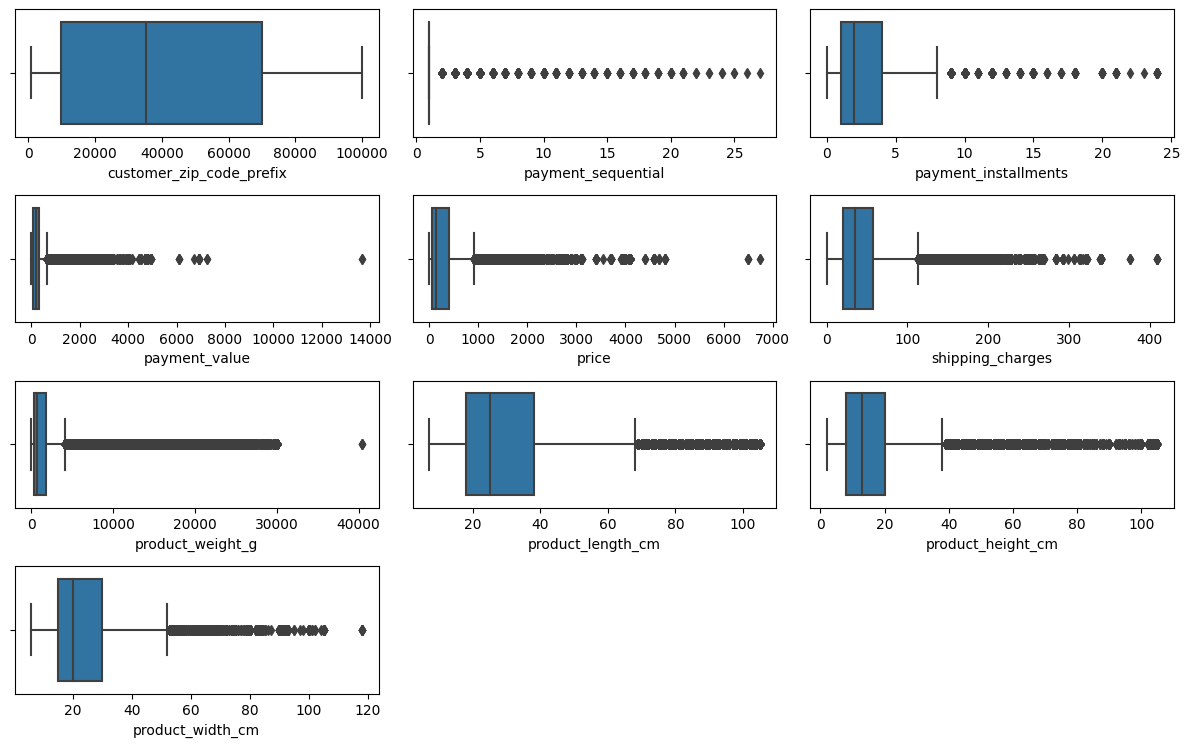

In [36]:
num = all_data.select_dtypes(include=['float64', 'int64']).columns # numerical features

plt.figure(figsize=(12,9))
for i in range(0,len(num)):
    plt.subplot(5,int(len(num)/3),i+1)
    sns.boxplot(data=all_data, x=all_data[num[i]])
    plt.tight_layout()

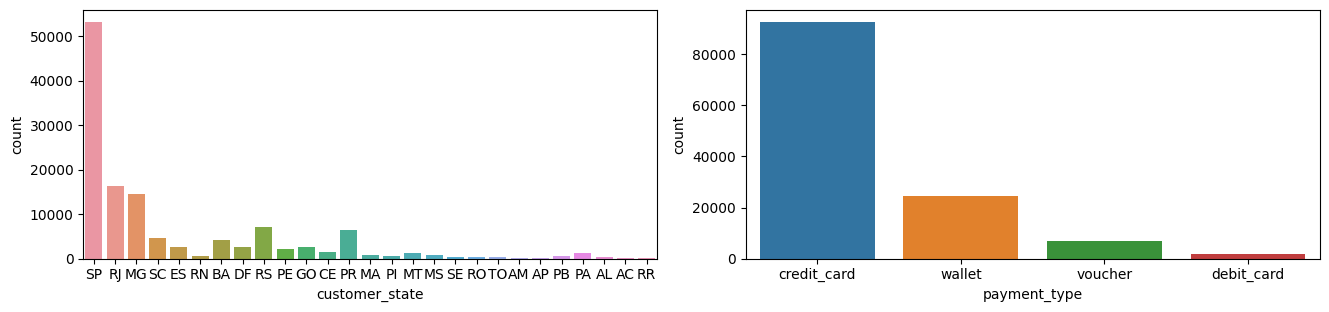

In [37]:
# some categorical features
cat = all_data[['customer_state', 'payment_type']]

fig = plt.figure(figsize=(20,15))
for index,col in enumerate(cat):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=all_data)
fig.tight_layout(pad=1.0)

In [24]:
print(all_data.payment_type.value_counts())
print('==='*10)
print(all_data.customer_state.value_counts())
print('==='*10)
print('nunique customer state:', all_data.customer_state.nunique())
print('==='*10)
print('nunique customer zip state:', all_data.customer_zip_code_prefix.nunique())
print('==='*10)
# here's why above plot can't show proper countplot in customer_city and product_category_name, because you have too many unique value
print('nunique customer city:', all_data['customer_city'].nunique())
print('==='*10)
print('nunique product category name:', all_data.product_category_name.nunique())

payment_type
credit_card    92700
wallet         24371
voucher         6880
debit_card      1756
Name: count, dtype: int64
customer_state
SP    53289
RJ    16328
MG    14550
RS     7038
PR     6356
SC     4566
BA     4289
DF     2599
GO     2556
ES     2529
PE     2050
CE     1573
MT     1170
PA     1160
MA      905
MS      892
PB      675
PI      592
RN      590
AL      467
SE      419
TO      351
RO      333
AM      190
AC      104
AP       87
RR       49
Name: count, dtype: int64
nunique customer state: 27
nunique customer zip state: 14920
nunique customer city: 4093
nunique product category name: 70


In [26]:
# check total unique value in product, customer, seller, and order id
id_all = all_data[['product_id', 'customer_id', 'seller_id', 'order_id']]
print(id_all.nunique())

# i think customer_id, product_id, order_id doesn't correlated to shipping late as they're just unique id to distinguish customer, product, and order
# seller_id could potentially cause shipping late, but it's just my hypothesis

product_id      32497
customer_id    125707
seller_id        3034
order_id       125707
dtype: int64


In [27]:
# DATA PREPROCESSING
# handling id: just drop all id
# customer_zip_code_prefix, customer_city: drop them. we already have customer_state that represent destination

all_data = all_data.drop(columns=['product_id', 'customer_id',
                                  'order_id', 'seller_id',
                                 'customer_zip_code_prefix',
                                'customer_city'], axis=1)

# Feature Engineering

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125707 entries, 0 to 125706
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_purchase_timestamp  125707 non-null  object 
 1   order_approved_at         125707 non-null  object 
 2   customer_state            125707 non-null  object 
 3   payment_sequential        125707 non-null  int64  
 4   payment_type              125707 non-null  object 
 5   payment_installments      125707 non-null  int64  
 6   payment_value             125707 non-null  float64
 7   price                     125707 non-null  float64
 8   shipping_charges          125707 non-null  float64
 9   product_category_name     125707 non-null  object 
 10  product_weight_g          125707 non-null  float64
 11  product_length_cm         125707 non-null  float64
 12  product_height_cm         125707 non-null  float64
 13  product_width_cm          125707 non-null  f

In [44]:
all_data.head()

,order_purchase_timestamp,order_approved_at,customer_state,payment_sequential,payment_type,payment_installments,payment_value,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,2017-10-22 18:57:54,2017-10-22 19:14:13,SP,1,credit_card,1,259.14,223.51,84.65,None,491.0,19.0,12.0,16.0
1,2018-06-20 21:40:31,2018-06-20 22:20:20,RJ,1,credit_card,8,382.39,170.80,23.79,None,440.0,18.0,14.0,17.0
2,2018-02-16 16:19:31,2018-02-17 16:15:35,SP,1,credit_card,4,249.25,64.40,17.38,None,2200.0,16.0,16.0,16.0
3,2018-08-18 18:04:29,2018-08-18 18:15:16,MG,1,credit_card,2,27.79,264.50,30.72,None,1450.0,68.0,3.0,48.0
4,2017-12-22 16:44:04,2017-12-22 17:31:31,SP,1,credit_card,1,76.15,779.90,30.66,None,300.0,17.0,4.0,12.0


In [29]:
# create new feature: product_volume
all_data['product_volume'] = all_data.product_length_cm * all_data.product_height_cm * all_data.product_width_cm

# drop these 3 columns
all_data = all_data.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

# create new feature: money_spend
all_data['money_spend'] = all_data.price + all_data.shipping_charges

# drop 2 columns
all_data = all_data.drop(columns=['price', 'shipping_charges'], axis=1)

### simplify product_category_name

In [26]:
all_data['product_category_name'].unique() #nunqie = 70

array(['toys', 'watches_gifts', 'costruction_tools_garden',
       'bed_bath_table', 'auto', 'health_beauty', 'cool_stuff',
       'garden_tools', 'furniture_decor', 'fashion_shoes',
       'sports_leisure', 'baby', 'housewares',
       'construction_tools_construction', 'electronics',
       'home_appliances', 'audio', 'consoles_games', 'stationery',
       'furniture_living_room', 'computers_accessories', 'perfumery',
       'kitchen_dining_laundry_garden_furniture',
       'fashion_bags_accessories', 'market_place', 'telephony',
       'home_construction', 'office_furniture',
       'industry_commerce_and_business', 'food_drink', 'drinks',
       'agro_industry_and_commerce', 'signaling_and_security', 'food',
       'pet_shop', 'luggage_accessories', 'home_appliances_2',
       'small_appliances', 'tablets_printing_image',
       'construction_tools_lights', 'musical_instruments', 'home_confort',
       'air_conditioning', 'construction_tools_safety',
       'costruction_tools_tools

In [30]:
def classify_product_cat(x):
    
    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

In [31]:
all_data['product_category_name'] = all_data.product_category_name.apply(classify_product_cat)

In [29]:
all_data['product_category_name'].value_counts()

product_category_name
Entertainment              97496
Electronics                 8439
Furniture                   7835
Beauty & Health             4240
Home & Garden               3512
Fashion                     2593
Books & Stationery           895
Industry & Construction      463
Food & Drinks                234
Name: count, dtype: int64

### extract new features from datetime64

In [34]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [35]:
to_datetime = all_data.loc[:, ('order_purchase_timestamp', 'order_approved_at')]

# convert object to datetime
for col in to_datetime:
    all_data[col] = pd.to_datetime(all_data[col], format='%Y-%m-%d %H:%M:%S')

### Failed

In [ ]:
def numOfDays(date1, date2):
    return reduce(lambda x, y: (y-x).dt.days, [date1, date2])

In [32]:
# create new column: waiting_time
all_data['waiting_time'] = numOfDays(all_data['order_purchase_timestamp'], all_data['order_approved_at'])

In [35]:
all_data['waiting_time'].nunique

<bound method IndexOpsMixin.nunique of 0         0
1         0
2         0
3         0
4         0
         ..
125702    0
125703    0
125704    0
125705    0
125706    0
Name: waiting_time, Length: 125707, dtype: int64>

In [ ]:
all_data = all_data.drop(columns='waiting_time', axis=1)

**Don't know why, all waiting_time is 0. is it because all orders are processed in the same days?. Right after the customer purchase it, on the same day the seller approved it?. Is it make sense?.**

### order_purchase_timestamp

In [36]:
# extract month and day from order_purchase_timestamp
all_data['order_purchase_month'] = all_data["order_purchase_timestamp"].dt.month
all_data['order_purchase_day'] = all_data["order_purchase_timestamp"].dt.day

# sin cos transformation of order_purchase_month
all_data["order_purchase_month_sin"] = sin_transformer(12).fit_transform(all_data["order_purchase_month"])
all_data["order_purchase_month_cos"] = cos_transformer(12).fit_transform(all_data["order_purchase_month"])

# sin cos transformation of order_purchase_day
all_data["order_purchase_day_sin"] = sin_transformer(365).fit_transform(all_data["order_purchase_day"])
all_data["order_purchase_day_cos"] = cos_transformer(365).fit_transform(all_data["order_purchase_day"])

all_data = all_data.drop(columns=['order_purchase_month', 'order_purchase_day'], axis=1)

In [37]:
# extract hour and minute from order_purchase_timestamp
all_data['order_purchase_hour'] = all_data["order_purchase_timestamp"].dt.hour
all_data['order_purchase_minute'] = all_data["order_purchase_timestamp"].dt.minute

# Convert hour and minute into radian
all_data['order_purchase_radian_hour'] = 2 * np.pi * all_data['order_purchase_hour'] / 24
all_data['order_purchase_radian_minute'] = 2 * np.pi * all_data['order_purchase_minute'] / 60

# Sin cos transformation of radian hour and minute
all_data['order_purchase_hour_sin'] = np.sin(all_data['order_purchase_radian_hour'] )
all_data['order_purchase_hour_cos'] = np.cos(all_data['order_purchase_radian_hour'] )
all_data['order_purchase_minute_sin'] = np.sin(all_data['order_purchase_radian_minute'])
all_data['order_purchase_minute_cos'] = np.cos(all_data['order_purchase_radian_minute'])

all_data = all_data.drop(columns=['order_purchase_hour', 'order_purchase_minute',
                      'order_purchase_radian_hour', 'order_purchase_radian_minute'
                      ], axis=1)

### order_approved_at

In [38]:
# extract month and day from order_approved_at
all_data['order_approved_month'] = all_data["order_approved_at"].dt.month
all_data['order_approved_day'] = all_data["order_approved_at"].dt.day

# sin cos transformation of order_approved_month
all_data["order_approved_month_sin"] = sin_transformer(12).fit_transform(all_data["order_approved_month"])
all_data["order_approved_month_cos"] = cos_transformer(12).fit_transform(all_data["order_approved_month"])

# sin cos transformation of order_approved_day
all_data["order_approved_day_sin"] = sin_transformer(365).fit_transform(all_data["order_approved_day"])
all_data["order_approved_day_cos"] = cos_transformer(365).fit_transform(all_data["order_approved_day"])

all_data = all_data.drop(columns=['order_approved_month', 'order_approved_day'], axis=1)

In [39]:
# extract hour and minute from order_purchase_timestamp
all_data['order_approved_hour'] = all_data["order_approved_at"].dt.hour
all_data['order_approved_minute'] = all_data["order_approved_at"].dt.minute

# Convert hour and minute into radian
all_data['order_approved_radian_hour'] = 2 * np.pi * all_data['order_approved_hour'] / 24
all_data['order_approved_radian_minute'] = 2 * np.pi * all_data['order_approved_minute'] / 60

# Sin and cos transformation of radian hour and minute 
all_data['order_approved_hour_sin'] = np.sin(all_data['order_approved_radian_hour'] )
all_data['order_approved_hour_cos'] = np.cos(all_data['order_approved_radian_hour'] )
all_data['order_approved_minute_sin'] = np.sin(all_data['order_approved_radian_minute'])
all_data['order_approved_minute_cos'] = np.cos(all_data['order_approved_radian_minute'])

all_data = all_data.drop(columns=['order_approved_hour', 'order_approved_minute',
                      'order_approved_radian_hour', 'order_approved_radian_minute'
                      ], axis=1)

In [40]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125707 entries, 0 to 125706
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_purchase_timestamp   125707 non-null  datetime64[ns]
 1   order_approved_at          125707 non-null  datetime64[ns]
 2   customer_state             125707 non-null  object        
 3   payment_sequential         125707 non-null  int64         
 4   payment_type               125707 non-null  object        
 5   payment_installments       125707 non-null  int64         
 6   payment_value              125707 non-null  float64       
 7   product_category_name      125707 non-null  object        
 8   product_weight_g           125707 non-null  float64       
 9   product_volume             125707 non-null  float64       
 10  money_spend                125707 non-null  float64       
 11  waiting_time               125707 non-null  int64   

In [40]:
all_data = all_data.drop(columns=['order_purchase_timestamp', 'order_approved_at'], axis=1)

## Handling categorical features before modeling

In [41]:
# now how to encode customer_state, product_category_name, payment_type?
# let's use label encoder
from sklearn.preprocessing import LabelEncoder

to_encode = all_data[['customer_state', 'product_category_name', 'payment_type']]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in to_encode:
    all_data[col] = label_encoder.fit_transform(all_data[col])

In [42]:
all_data.head()

,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_volume,money_spend,order_purchase_month_sin,...,order_purchase_minute_sin,order_purchase_minute_cos,order_approved_month_sin,order_approved_month_cos,order_approved_day_sin,order_approved_day_cos,order_approved_hour_sin,order_approved_hour_cos,order_approved_minute_sin,order_approved_minute_cos
0,25,1,0,1,259.14,3,491.0,3648.0,308.16,-8.660254e-01,...,-0.309017,0.951057,-8.660254e-01,0.5,0.369725,0.929141,-0.965926,2.588190e-01,0.994522,1.045285e-01
1,18,1,0,8,382.39,2,440.0,4284.0,194.59,1.224647e-16,...,-0.866025,-0.500000,1.224647e-16,-1.0,0.337523,0.941317,-0.500000,8.660254e-01,0.866025,-5.000000e-01
2,25,1,0,4,249.25,7,2200.0,4096.0,81.78,8.660254e-01,...,0.913545,-0.406737,8.660254e-01,0.5,0.288482,0.957485,-0.866025,-5.000000e-01,1.000000,2.832769e-16
3,10,1,0,2,27.79,3,1450.0,9792.0,295.22,-8.660254e-01,...,0.406737,0.913545,-8.660254e-01,-0.5,0.304921,0.952378,-1.000000,-1.836970e-16,1.000000,2.832769e-16
4,25,1,0,1,76.15,3,300.0,816.0,810.56,-2.449294e-16,...,-0.994522,-0.104528,-2.449294e-16,1.0,0.369725,0.929141,-0.965926,-2.588190e-01,-0.104528,-9.945219e-01


### Split features and label

In [43]:
# split train and test
train = all_data[:ntrain]
test = all_data[ntrain:]

# split X and y in train
X, y = train, y_train

print(X.shape, y.shape)

(87428, 25) (87428,)


# Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(X, y)
x_train_fs = fs.transform(X)
# x_test_fs = fs.transform(x_test)

In [ ]:
# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

## Min Max Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0.96153846, 0.        , 0.        , ..., 0.62940952, 0.99726095,
        0.55226423],
       [0.69230769, 0.        , 0.        , ..., 0.9330127 , 0.9330127 ,
        0.25      ],
       [0.96153846, 0.        , 0.        , ..., 0.25      , 1.        ,
        0.5       ],
       ...,
       [0.96153846, 0.        , 0.        , ..., 0.01703709, 0.9330127 ,
        0.25      ],
       [0.96153846, 0.        , 0.66666667, ..., 0.25      , 0.79389263,
        0.0954915 ],
       [0.23076923, 0.        , 0.        , ..., 0.9330127 , 0.95677273,
        0.29663168]])

### Handling imbalanced label

In [47]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state= 42)
#x_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [48]:
#print(x_train_resampled.shape, y_train_resampled.shape)

(163644, 26) (163644,)


### Utilizing KFold-cross cv

In [45]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

from sklearn.naive_bayes import MultinomialNB, GaussianNB 

from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import precision_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [46]:
# MODEL 1: XGBClassifier

xgb = XGBClassifier()
xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("accuracy for each fold:", xgb_scores)

# Calculate the mean accuracy across all folds
mean_acc_xgb = np.mean(xgb_scores)

# Print the mean accuracy
print("Mean accuracy:", mean_acc_xgb)

accuracy for each fold: [0.9402379  0.93949445 0.93800755 0.93891907 0.94000572]
Mean accuracy: 0.9393329397780246


In [47]:
# MODEL 2: Random Forest

rfc = RandomForestClassifier ()
rfc_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("accuracy for each fold:", rfc_scores)

# Calculate the mean accuracy across all folds
mean_acc_rfc = np.mean(rfc_scores)

# Print the mean accuracy
print("Mean accuracy:", mean_acc_rfc)

accuracy for each fold: [0.94772961 0.94732929 0.94698616 0.94766943 0.94829854]
Mean accuracy: 0.947602607434205


### Hold-out CV

In [48]:
# training_portion = .8
# train_size = int(len(combined) * training_portion)

# split X into train and validation set
# the weakness of splitting data using this method is we can't shuffle it
# X_train = x_train_resampled[:train_size]
# X_val = x_train_resampled[train_size:]

# in case of label could be categorical
# y_train = y_train_resampled[:train_size]
# y_val = y_train_resampled[train_size:]

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(61199, 25) (61199,) (26229, 25) (26229,)


In [49]:
# let's say i'm satiesfied with xgb model
xgb.fit(X_train, y_train)

valid_predict_xgb = xgb.predict(X_val)

train_acc = xgb.score(X_train, y_train)*100
valid_acc_xgb = accuracy_score(valid_predict_xgb, y_val)*100

print("XGB Train Accuracy : {}% ".format(train_acc))
print("XGB Validation Accuracy  : {}% ".format(valid_acc_xgb))
print(classification_report(valid_predict_xgb, y_val))

XGB Train Accuracy : 95.1437114985539% 
XGB Validation Accuracy  : 93.92656982729041% 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     26051
           1       0.08      0.72      0.14       178

    accuracy                           0.94     26229
   macro avg       0.54      0.83      0.55     26229
weighted avg       0.99      0.94      0.96     26229



In [50]:
# let's say i'm satiesfied with rfc model
rfc.fit(X_train, y_train)

valid_predict_rfc = rfc.predict(X_val)

train_acc = rfc.score(X_train, y_train)*100
valid_acc_rfc = accuracy_score(valid_predict_rfc, y_val)*100

print("RFC Train Accuracy : {}% ".format(train_acc))
print("RFC Validation Accuracy  : {}% ".format(valid_acc_rfc))
print(classification_report(valid_predict_rfc, y_val))

RFC Train Accuracy : 99.99182993186163% 
RFC Validation Accuracy  : 94.73483548743758% 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     25929
           1       0.18      0.98      0.30       300

    accuracy                           0.95     26229
   macro avg       0.59      0.97      0.64     26229
weighted avg       0.99      0.95      0.96     26229



In [84]:
# export model
import pickle
filename = 'rfc_99998_97368_no_hyper.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
loaded_rfc = pickle.load(open(filename, 'rb'))

# Feature Importance

                      Feature  Importance
8                 money_spend    0.082177
4               payment_value    0.081273
7              product_volume    0.076970
6            product_weight_g    0.071294
15  order_purchase_minute_sin    0.059311
16  order_purchase_minute_cos    0.058514
0              customer_state    0.057114
24  order_approved_minute_cos    0.048736
23  order_approved_minute_sin    0.047368
14    order_purchase_hour_cos    0.040324
13    order_purchase_hour_sin    0.038939
21    order_approved_hour_sin    0.037802
22    order_approved_hour_cos    0.036912
12     order_purchase_day_cos    0.034646
20     order_approved_day_cos    0.034398
11     order_purchase_day_sin    0.034044
19     order_approved_day_sin    0.033877
3        payment_installments    0.030383
5       product_category_name    0.021563
17   order_approved_month_sin    0.017028
9    order_purchase_month_sin    0.015717
10   order_purchase_month_cos    0.013756
18   order_approved_month_cos    0

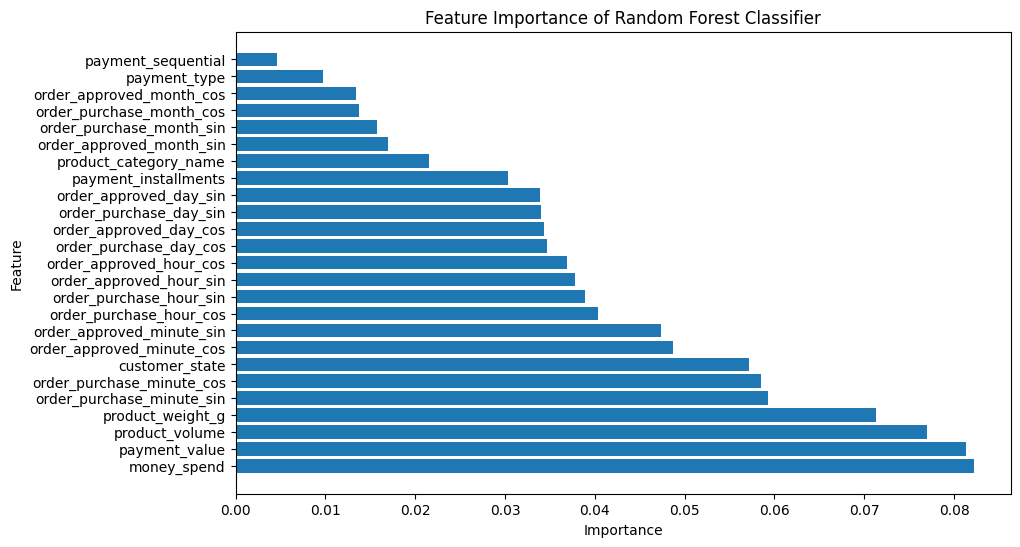

In [51]:
# Get feature importances from the model
feature_importances = rfc.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

# Hyperparameter Tuning: Random Forest

In [52]:
from time import time
import pprint
from sklearn.metrics import make_scorer
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV

# A wrapper for measuring time and performances of different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

# Setting the search space
search_spaces = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0),
    'min_impurity_decrease': Real(0.0, 1.0)
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create BayesSearchCV object
opt = BayesSearchCV(
    rf_classifier, 
    search_spaces,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    n_iter=20,
    return_train_score=False,
    refit=True,
    verbose=100
)

# Report the best parameters
best_params = report_perf(opt, X, y, 'Random Forest Classifier')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=7, max_features=0.32680267803171864, min_impurity_decrease=0.5262113943657555, min_samples_leaf=8, min_samples_split=7, n_estimators=51
[CV 1/5; 1/1] END max_depth=7, max_features=0.32680267803171864, min_impurity_decrease=0.5262113943657555, min_samples_leaf=8, min_samples_split=7, n_estimators=51;, score=0.936 total time=   1.1s
[CV 2/5; 1/1] START max_depth=7, max_features=0.32680267803171864, min_impurity_decrease=0.5262113943657555, min_samples_leaf=8, min_samples_split=7, n_estimators=51
[CV 2/5; 1/1] END max_depth=7, max_features=0.32680267803171864, min_impurity_decrease=0.5262113943657555, min_samples_leaf=8, min_samples_split=7, n_estimators=51;, score=0.936 total time=   1.1s
[CV 3/5; 1/1] START max_depth=7, max_features=0.32680267803171864, min_impurity_decrease=0.5262113943657555, min_samples_leaf=8, min_samples_split=7, n_estimators=51
[CV 3/5; 1/1] END max_depth=7, max_features=0.326

In [53]:
# Use the best hyperparameters to create the final model
final_model = RandomForestClassifier(random_state=42,
    n_estimators=200,
    max_depth=20,
    max_features=1.0,
    min_impurity_decrease=0.0,
    min_samples_split=10,
    min_samples_leaf=1)

# Fit the final model to the training data
final_model.fit(X_train, y_train)

# predict in validation set
valid_predict_final = final_model.predict(X_val)

train_acc_final = final_model.score(X_train, y_train)*100
valid_acc_final = accuracy_score(valid_predict_final, y_val)*100

print("RFC Tuning Train Accuracy : {}% ".format(train_acc_final))
print("RFC Tuning Validation Accuracy  : {}% ".format(valid_acc_final))
print(classification_report(valid_predict_final, y_val))

RFC Tuning Train Accuracy : 96.46072648245885% 
RFC Tuning Validation Accuracy  : 94.22776316291129% 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     26028
           1       0.11      0.89      0.19       201

    accuracy                           0.94     26229
   macro avg       0.55      0.92      0.58     26229
weighted avg       0.99      0.94      0.96     26229



# Submission

In [54]:
model_predict = final_model.predict(test)

In [55]:
model_predict

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
df_test['is_late'] = pd.DataFrame(model_predict)
df_test.head()

,order_purchase_timestamp,order_approved_at,customer_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,...,seller_id,price,shipping_charges,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late
0,2017-11-18 12:29:57,2017-11-18 12:46:08,I74lXDOfoqsp,6020,goiania,GO,1,credit_card,2,155.77,...,3jwvL6ihC45G,24.10,20.90,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0,0
1,2018-06-02 17:13:12,2018-06-02 20:12:23,47TuLHF2s7X5,23020,viamao,RS,1,credit_card,1,4.07,...,GlLj704QXlDB,42.89,12.28,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0,0
2,2018-01-08 11:01:30,2018-01-09 07:24:03,dQ0dqI8Qwlj8,75094,campinas,SP,1,wallet,1,381.59,...,V3iKL8r9W9NR,50.21,67.11,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0,0
3,2017-03-10 10:24:46,2017-03-10 10:24:46,iQCmWhNkIczb,89284,santana de parnaiba,SP,1,credit_card,3,14.76,...,RNBdBKsXebna,89.10,62.05,yWlFGkKYfrpa,toys,8950.0,40.0,30.0,40.0,0
4,2017-12-02 10:04:07,2017-12-05 04:13:30,Dp2g6JH8tO5Z,39810,aripuana,MT,1,wallet,1,284.09,...,5Ja2lH0N2OZt,2139.99,9.41,h6MCbrwh5kiC,toys,2301.0,32.0,35.0,34.0,0


In [61]:
df_test.columns

Index(['order_purchase_timestamp', 'order_approved_at', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_id', 'seller_id', 'price', 'shipping_charges',
       'product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'is_late'],
      dtype='object')

In [64]:
df_test.shape

(38279, 21)

In [58]:
df_test['is_late'].value_counts()

is_late
0    37976
1      303
Name: count, dtype: int64

In [65]:
df_test['order_id']

0        u6rPMRAYIGig
1        ohY8f4FEbX19
2        I28liQek73i2
3        bBG1T89mlY8W
4        CYxJJSQS8Lbo
             ...     
38274    QKBW3XKevmfn
38275    Tjiw9bj8HtLr
38276    mCPofb7A1aTq
38277    scVuqN10zbgb
38278    oLKXX8tqU6eQ
Name: order_id, Length: 38279, dtype: object

In [60]:
order_id = df_test['order_id']
is_late = df_test.iloc[:,-1]

submission = pd.DataFrame(list(zip(order_id, is_late)),
               columns =['order_id', 'is_late'])

submission.head(20)

,order_id,is_late
0,u6rPMRAYIGig,0
1,ohY8f4FEbX19,0
2,I28liQek73i2,0
3,bBG1T89mlY8W,0
4,CYxJJSQS8Lbo,0
5,kUkQCFPtDvrC,0
6,eV98svHRmPNG,0
7,b2tsoISX5lnP,0
8,O0D3th8M88nF,0
9,yBTGlSf8GGMV,0


In [62]:
submission.to_csv('model_day_2.csv', index=False)